In [1]:
import pandas as pd

input = pd.read_csv("input.csv")
input.head()

,duration,dtstart,dtend,location,author,type,title
0,4.0,2022-05-18T02:00:00Z,2022-05-18T02:04:00Z,"MSR Main room - even hours - , ,","Nhan Nguyen, Sarah Nadi",MSR Technical Papers,An Empirical Evaluation of GitHub Copilot’s C...
1,4.0,2022-05-18T02:04:00Z,2022-05-18T02:08:00Z,"MSR Main room - even hours - , ,","Nikitha Rao, Jason Tsay, Martin Hirzel, Vince...",MSR Technical Papers,Comments on Comments: Where Code Review and D...
2,7.0,2022-05-18T02:08:00Z,2022-05-18T02:15:00Z,"MSR Main room - even hours - , ,","Akalanka Galappaththi, Sarah Nadi, Christoph ...",MSR Technical Papers,Does This Apply to Me? An Empirical Study of ...
3,7.0,2022-05-18T02:15:00Z,2022-05-18T02:22:00Z,"MSR Main room - even hours - , ,","Jirat Pasuksmit, Patanamon Thongtanunam, Shan...",MSR Technical Papers,Towards Reliable Agile Iterative Planning via...
4,7.0,2022-05-18T02:22:00Z,2022-05-18T02:29:00Z,"MSR Main room - even hours - , ,","Ahmad Abdellatif, Mairieli Wessel, Igor Stein...",MSR Technical Papers,BotHunter: An Approach to Detect Software Bot...


In [2]:
input['id'] = range(1, len(input)+1)
for i in range(len(input)):
    # check if author is a string
    if type(input['author'][i]) != str:
        input['author'][i] = []
    else:
        input['author'][i] = input['author'][i].split(',')
input.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_27868\338955969.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['author'][i] = input['author'][i].split(',')
C:\Users\hp\AppData\Local\Temp\ipykernel_27868\338955969.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['author'][i] = []


,duration,dtstart,dtend,location,author,type,title,id
0,4.0,2022-05-18T02:00:00Z,2022-05-18T02:04:00Z,"MSR Main room - even hours - , ,","[ Nhan Nguyen, Sarah Nadi]",MSR Technical Papers,An Empirical Evaluation of GitHub Copilot’s C...,1
1,4.0,2022-05-18T02:04:00Z,2022-05-18T02:08:00Z,"MSR Main room - even hours - , ,","[ Nikitha Rao, Jason Tsay, Martin Hirzel, V...",MSR Technical Papers,Comments on Comments: Where Code Review and D...,2
2,7.0,2022-05-18T02:08:00Z,2022-05-18T02:15:00Z,"MSR Main room - even hours - , ,","[ Akalanka Galappaththi, Sarah Nadi, Christo...",MSR Technical Papers,Does This Apply to Me? An Empirical Study of ...,3
3,7.0,2022-05-18T02:15:00Z,2022-05-18T02:22:00Z,"MSR Main room - even hours - , ,","[ Jirat Pasuksmit, Patanamon Thongtanunam, S...",MSR Technical Papers,Towards Reliable Agile Iterative Planning via...,4
4,7.0,2022-05-18T02:22:00Z,2022-05-18T02:29:00Z,"MSR Main room - even hours - , ,","[ Ahmad Abdellatif, Mairieli Wessel, Igor St...",MSR Technical Papers,BotHunter: An Approach to Detect Software Bot...,5


In [3]:
import GA
import random

population_size = 50
max_generations = 100
crossover_probability = 0.8
mutation_probability = 0.2
num_sessions = 28


# create papers
papers = []
for i in range(len(input)):
    paper = GA.Paper(id=input['id'][i], authors=input['author'][i], duration=input['duration'][i])
    papers.append(paper)

session_lengths = [50]*num_sessions
num_tracks_per_session = [random.randint(1, 2) for _ in range(num_sessions)]

session_details = [(
    session_lengths[i],
    num_tracks_per_session[i]
) for i in range(len(session_lengths))]

# Create an instance of the GA class
ga = GA.GeneticAlgorithm(population_size, max_generations, crossover_probability, mutation_probability)

# Create the initial population
initial_population = ga.create_population(papers, session_details, population_size)
pop = GA.Population(initial_population, population_size)

pop.print_population()


Solution 1:
Session 1 (Max length: 50 minutes):
  Track 1 (Total duration: 48.0 minutes):
    Paper ID: 15, Authors: , Duration: 22.0 minutes
    Paper ID: 76, Authors: , Duration: 14.0 minutes
    Paper ID: 21, Authors:  Rosa Filgueira,  Daniel Garijo, Duration: 4.0 minutes
    Paper ID: 9, Authors:  Ambarish Moharil,  Dmitrii Orlov,  Samar Jameel,  Tristan Trouwen,  Nathan Cassee,  Alexander Serebrenik, Duration: 4.0 minutes
    Paper ID: 57, Authors:  Kimberly Truong,  Courtney Miller,  Bogdan Vasilescu,  Christian Kästner, Duration: 4.0 minutes
----------------------------------------
Session 2 (Max length: 50 minutes):
  Track 1 (Total duration: 47.13333333333333 minutes):
    Paper ID: 80, Authors:  Anna Vlasova,  Maria Tigina,  Ilya Vlasov,  Anastasiia Birillo,  Yaroslav Golubev,  Timofey Bryksin, Duration: 4.0 minutes
    Paper ID: 42, Authors:  Masanari Kondo,  Shinobu Saito,  IIMURA Yukako,  Eunjong Choi,  Osamu Mizuno,  Yasutaka Kamei,  Naoyasu Ubayashi, Duration: 7.0 minute

In [4]:
# calculate fitness of the initial population and print the best solution
best = pop.best_solution(len(papers))
best[0].print_solution()

Session 1 (Max length: 50 minutes):
  Track 1 (Total duration: 49.0 minutes):
    Paper ID: 76, Authors: , Duration: 14.0 minutes
    Paper ID: 3, Authors:  Akalanka Galappaththi,  Sarah Nadi,  Christoph Treude, Duration: 7.0 minutes
    Paper ID: 164, Authors:  Nikitha Rao,  Jason Tsay,  Martin Hirzel,  Vincent J. Hellendoorn, Duration: 8.0 minutes
    Paper ID: 157, Authors:  Cedric Richter,  Heike Wehrheim, Duration: 8.0 minutes
    Paper ID: 30, Authors:  Kevin Jesse,  Prem Devanbu, Duration: 4.0 minutes
    Paper ID: 90, Authors:  Jordan Samhi,  Tegawendé F. Bissyandé,  Jacques Klein, Duration: 4.0 minutes
    Paper ID: 91, Authors: Katharina Wickert,  Stefan Krüger,  Eric Bodden,  Mira Mezini, Duration: 4.0 minutes
----------------------------------------
Session 2 (Max length: 50 minutes):
  Track 1 (Total duration: 50.0 minutes):
    Paper ID: 86, Authors:  Wei Tang,  Yanlin Wang,  Hongyu Zhang,  Shi Han,  Ping Luo,  Dongmei Zhang, Duration: 7.0 minutes
    Paper ID: 99, Author

In [5]:
best[1]

{'weighted_time_penalty': 0.0,
 'weighted_author_penalty': 0.0,
 'weighted_distribution_penalty': 0.53475935828877,
 'weighted_total_time_unused': 8.464285714285715,
 'total_penalty': 8.999045072574486,
 'fitness': 0.10000955018622862}

In [6]:
# print fitness for all solutions
for i in range(population_size):
    print("Solution ", i, " fitness: ", pop.solutions[i].fitness(len(papers)))


Solution  0  fitness:  {'weighted_time_penalty': 0.0, 'weighted_author_penalty': 1.3054830287206265, 'weighted_distribution_penalty': 1.06951871657754, 'weighted_total_time_unused': 9.25, 'total_penalty': 11.625001745298167, 'fitness': 0.07920790984226377}
Solution  1  fitness:  {'weighted_time_penalty': 0.0, 'weighted_author_penalty': 0.5249343832020997, 'weighted_distribution_penalty': 1.06951871657754, 'weighted_total_time_unused': 9.035714285714286, 'total_penalty': 10.630167385493927, 'fitness': 0.08598328526615015}
Solution  2  fitness:  {'weighted_time_penalty': 0.0, 'weighted_author_penalty': 1.8229166666666667, 'weighted_distribution_penalty': 0.53475935828877, 'weighted_total_time_unused': 8.464285714285715, 'total_penalty': 10.821961739241152, 'fitness': 0.08458832992841252}
Solution  3  fitness:  {'weighted_time_penalty': 0.0, 'weighted_author_penalty': 0.0, 'weighted_distribution_penalty': 0.53475935828877, 'weighted_total_time_unused': 9.035714285714286, 'total_penalty': 

100%|██████████| 100/100 [00:24<00:00,  4.13it/s]


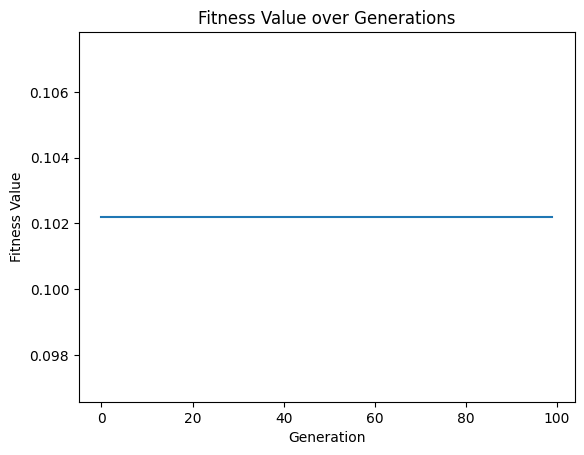

(<GA.Solution at 0x2a2f5608100>,
 {'weighted_time_penalty': 0.0,
  'weighted_author_penalty': 0.0,
  'weighted_distribution_penalty': 0.53475935828877,
  'weighted_total_time_unused': 8.25,
  'total_penalty': 8.78475935828877,
  'fitness': 0.10219975406476295})

In [7]:
# run the genetic algorithm

pop = ga.run(papers, num_sessions, session_lengths, num_tracks_per_session, population_size)
# print out results of fittest individual in final population
pop

In [8]:
# print pop 
pop[0].print_solution()


Session 1 (Max length: 50 minutes):
  Track 1 (Total duration: 48.13333333333333 minutes):
    Paper ID: 2, Authors:  Nikitha Rao,  Jason Tsay,  Martin Hirzel,  Vincent J. Hellendoorn, Duration: 4.0 minutes
    Paper ID: 166, Authors:  Bonan Kou,  Yifeng Di,  Muhao Chen,  Tianyi Zhang, Duration: 8.0 minutes
    Paper ID: 47, Authors:  Matteo Ciniselli,  Luca Pascarella,  Gabriele Bavota, Duration: 7.133333333333334 minutes
    Paper ID: 154, Authors:  Gunnar Kudrjavets,  Aditya Kumar,  Nachiappan Nagappan,  Ayushi Rastogi, Duration: 15.0 minutes
    Paper ID: 97, Authors:  Tatiana Castro Vélez,  Raffi Khatchadourian,  Mehdi Bagherzadeh,  Anita Raja, Duration: 7.0 minutes
    Paper ID: 86, Authors:  Wei Tang,  Yanlin Wang,  Hongyu Zhang,  Shi Han,  Ping Luo,  Dongmei Zhang, Duration: 7.0 minutes
----------------------------------------
Session 2 (Max length: 50 minutes):
  Track 1 (Total duration: 47.28333333333333 minutes):
    Paper ID: 74, Authors:  Irving Muller Rodrigues,  Daniel A